### 1. Записать систему уравнений для процентных ставок для рассматриваемой Компании.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Облигации.csv')
data.head()

,Дата проведения аукциона,Регистрационный номер выпуска,Дата расчетов по аукциону,Дата погашения облигаций,Номинал,Средневзвешенная цена (% от номинала),Размещенный объем по номиналу (млн руб.),Размещенный объем по ценам заявок (млн руб.)
0,04.09.2019,4-10-22BR1-7,05.09.2019,12.09.2019,1000,999.950,"25 142,1","24 272,9"
1,28.08.2019,4-10-22BR1-7,29.08.2019,12.09.2019,1000,999.910,"25 170,0","25 572,7"
2,21.08.2019,4-10-22BR1-7,22.08.2019,12.09.2019,1000,999.860,"58 833,6","59 690,2"
3,14.08.2019,4-10-22BR1-7,15.08.2019,12.09.2019,1000,999.833,"95 285,6","96 538,0"
4,07.08.2019,4-10-22BR1-7,08.08.2019,12.09.2019,1000,999.760,"59 957,2","64 734,7"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Дата проведения аукциона                      13 non-null     object 
 1   Регистрационный номер выпуска                 13 non-null     object 
 2   Дата расчетов по аукциону                     13 non-null     object 
 3   Дата погашения облигаций                      13 non-null     object 
 4   Номинал                                       13 non-null     int64  
 5   Средневзвешенная цена (% от номинала)         13 non-null     float64
 6   Размещенный объем по номиналу (млн руб.)      13 non-null     object 
 7   Размещенный объем по ценам заявок (млн руб.)  13 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 964.0+ bytes


In [6]:
data['Дата'] = df.index
data = data.sort_values(by='Дата', ascending = False)
data.head()

,Дата проведения аукциона,Регистрационный номер выпуска,Дата расчетов по аукциону,Дата погашения облигаций,Номинал,Средневзвешенная цена (% от номинала),Размещенный объем по номиналу (млн руб.),Размещенный объем по ценам заявок (млн руб.),Дата
12,09.06.2019,4-10-22BR1-7,13.06.2019,12.09.2019,1000,999.409,"88 166,1","87 223,7",12
11,19.06.2019,4-10-22BR1-7,20.06.2019,12.09.2019,1000,999.470,"81 213,7","80 211,9",11
10,26.06.2019,4-10-22BR1-7,27.06.2019,12.09.2019,1000,999.485,"3 450,0","3 460,6",10
9,03.07.2019,4-10-22BR1-7,04.07.2019,12.09.2019,1000,999.531,"119 302,6","122 659,2",9
8,10.07.2019,4-10-22BR1-7,11.07.2019,12.09.2019,1000,999.581,"101 939,1","102 544,8",8


In [8]:
def calculate_yield(data):
    r = 7.25
    col_dates = data['Дата']
    col_adj_close = data['Средневзвешенная цена (% от номинала)']

    col_log_adj_close = np.log(col_adj_close)
    col_diff_log_adj_close = col_log_adj_close - col_log_adj_close.shift(1)
    col_cum_diff_log_adj_close = (col_diff_log_adj_close * col_dates).cumsum()
    yield_curve = ((col_cum_diff_log_adj_close / col_adj_close) * (r/12)).cumsum()
    return yield_curve

yield_curve = calculate_yield(data)

In [9]:
yield_curve.head(12)

12             NaN
11    4.058383e-07
10    9.023896e-07
9     1.649284e-06
8     2.638016e-06
7     3.863704e-06
6     5.209058e-06
5     6.705475e-06
4     8.298547e-06
3     1.002386e-05
2     1.178177e-05
1     1.356980e-05
dtype: float64

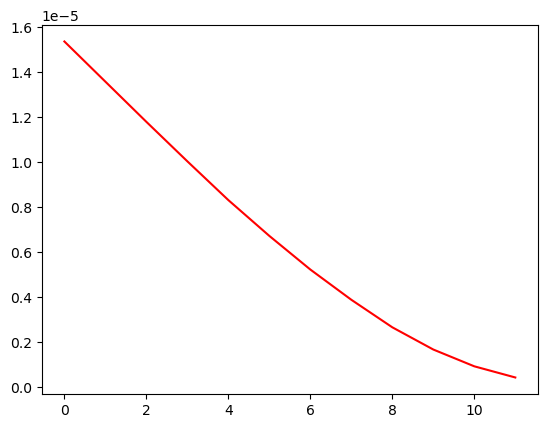

In [11]:
plt.plot(yield_curve, color='r')
plt.show()

### 2. Сделать кусочно-постоянное решение для кривой процентных ставок.

In [17]:
segments = 4
step = int(len(yield_curve) / segments)
df_сurve = pd.DataFrame()
df_сurve['rate'] = yield_curve

cp_curve = [df_сurve['rate'].iloc[i: i+step].mean() for i in range(0, len(df_сurve),step)]
per = np.array([5, 4, 3, 2, 1])
print(cp_curve)

[6.541139222855076e-07, 2.7170010580051604e-06, 6.737693475590646e-06, 1.1791811811062686e-05, 1.535776179702905e-05]


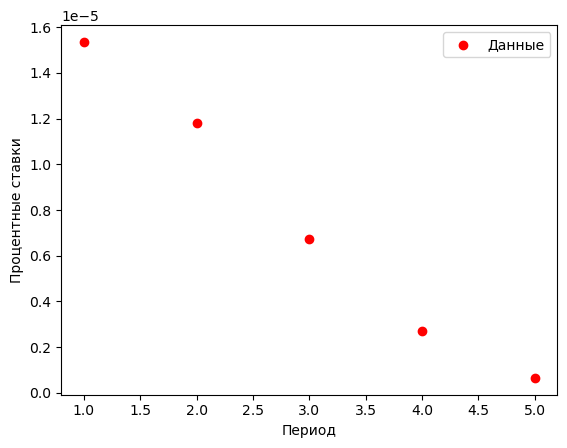

In [18]:
plt.scatter(per, cp_curve, label='Данные', color = 'r')
plt.xlabel('Период')
plt.ylabel('Процентные ставки')
plt.legend()
plt.show()